#### Import necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Gettig the data

In [13]:
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data', sep='\t',names=column_names)

In [14]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


#### Getting the movie titles table

In [15]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Now we merge the two tables

In [16]:
df = df.merge(movie_titles,how ='outer')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### creating a table with average rating and number of ratings

In [25]:
df.groupby("title")['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [30]:
df.groupby("title")['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

#### Rating's table

In [32]:
ratings = pd.DataFrame(df.groupby("title")['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### Number of ratings table

In [38]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()


,rating,Number of Rating,Number of Ratings,num of ratings
title,,,,
'Til There Was You (1997),2.333333,9,9,9
1-900 (1994),2.600000,5,5,5
101 Dalmatians (1996),2.908257,109,109,109
12 Angry Men (1957),4.344000,125,125,125
187 (1997),3.024390,41,41,41


In [73]:
rating_new = ratings.drop(['Number of Rating', 'num of ratings'], axis=1)
rating_new.head()

,rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Histogram for the "Number of Ratings" column

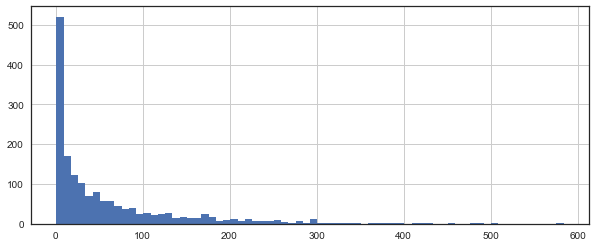

In [60]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

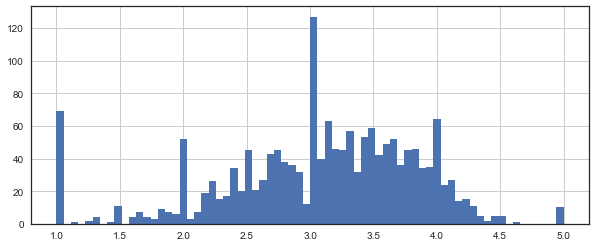

In [62]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

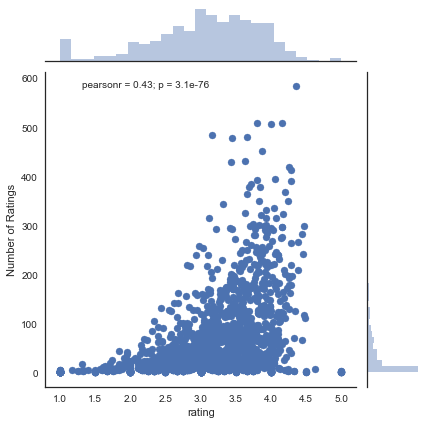

In [63]:
sns.jointplot(x="rating", y="Number of Ratings", data=ratings)

##### Now let's create a matrix that has the user ids on one axis and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [69]:
movie_matrix = df.pivot_table(index = 'user_id',columns = 'title',values = 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The movie which has been rated the most

In [74]:
rating_new.sort_values(by='Number of Ratings', ascending = False).head(10)

,rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


##### Movies with the highest rating ie rating is 5

In [78]:
rating_new.sort_values(by='rating', ascending = False).head(10)

,rating,Number of Ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


#### Lets take 2 movies Star Wars - a sci-fi movie and Scream- horror movie

#### We need the user ratings for these two movies which we get from the movie-matrix table.

In [81]:
user_rating_starwars = movie_matrix['Star Wars (1977)']
user_rating_starwars.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [84]:
user_rating_scream = movie_matrix['Scream (1996)']
user_rating_scream.head()

user_id
0    NaN
1    NaN
2    3.0
3    2.0
4    4.0
Name: Scream (1996), dtype: float64

#### We use the corrwith() as it computes the pairwise correlation between rows or columns of two DataFrame objects

In [89]:
similar_to_starwars = movie_matrix.corrwith(user_rating_starwars)
similar_to_scream = movie_matrix.corrwith(user_rating_scream)

In [94]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns = ['Correlation'])
corr_starwars.dropna().sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0


In [95]:
corr_scream = pd.DataFrame(similar_to_scream,columns = ['Correlation'])
corr_scream.dropna().sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Love and Death on Long Island (1997),1.0
Turbo: A Power Rangers Movie (1997),1.0
Caro Diario (Dear Diary) (1994),1.0
Time Tracers (1995),1.0
8 Seconds (1994),1.0
Safe Passage (1994),1.0
"Scarlet Letter, The (1926)",1.0
Maya Lin: A Strong Clear Vision (1994),1.0
"Line King: Al Hirschfeld, The (1996)",1.0


#### Filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [96]:
corr_starwars = corr_starwars.join(rating_new['Number of Ratings'])
corr_starwars.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [97]:
corr_starwars[corr_starwars['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


#### Now same for the horror movie Scream

In [98]:
corr_scream = corr_scream.join(rating_new['Number of Ratings'])
corr_scream.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.454859,9
1-900 (1994),-0.944911,5
101 Dalmatians (1996),0.124059,109
12 Angry Men (1957),-0.025659,125
187 (1997),0.382836,41


In [99]:
corr_scream[corr_scream['Number of Ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,Number of Ratings
title,,
Scream (1996),1.000000,478
Scream 2 (1997),0.706028,106
Seven (Se7en) (1995),0.435188,236
Starship Troopers (1997),0.419322,211
"Nightmare on Elm Street, A (1984)",0.410796,111
